In [2]:
%run scripts.py

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# File 1: reading file and first clustering: mass vs orbital period

Steps for reading data:
* Picking what parameters to keep for a specific test.
* Removing Nans, by removing from the dataframe planets that contain it for the chosen parameters.
* Deciding wether to standardizing data or not.

In [5]:
param_MP=['obj_orb_period_day','obj_phys_mass_mjup']
d_solar = sol_pd(cat_solar,param_MP)
M_solar, P_solar=d_solar['obj_phys_mass_mjup'], d_solar['obj_orb_period_day']

In [21]:
data_EU = exo_sol(file_EU,cat_solar,param_MP)

data_EU=data_EU.drop('K2-22 b') 
data_EU=data_EU.drop('K2-77 b')
data_EU=data_EU.drop('K2-95 b')

#corrections to the database - updated values
data_EU.loc['Kepler-57 c'].obj_phys_mass_mearth = np.log10(5.68)
data_EU.loc['Kepler-59 c'].obj_phys_mass_mearth = np.log10(0.0082*jupiterMass.to(earthMass))
data_EU.loc['Kepler-59 c'].obj_phys_radius_rearth = np.log10(.196*jupiterRad.to(earthRad))
data_EU.loc['Kepler-28 c'].obj_phys_mass_mearth = np.log10(10.9)
data_EU.loc['Kepler-28 c'].obj_phys_radius_rearth = np.log10(2.77)
data_EU.loc['Kepler-53 c'].obj_phys_mass_mearth = np.log10(35.5)
data_EU.loc['Kepler-53 c'].obj_phys_radius_rearth = np.log10(3.12)
data_EU.loc['Kepler-57 b'].obj_phys_mass_mearth = np.log10(118.1)
data_EU.loc['Kepler-57 b'].obj_phys_radius_rearth = np.log10(2.12)
data_EU.loc['Kepler-28 b'].obj_phys_mass_mearth = np.log10(8.8)
data_EU.loc['Kepler-28 b'].obj_phys_radius_rearth = np.log10(1.971)
data_EU.loc['Kepler-10 c'].obj_phys_mass_mearth = np.log10(7.37)
data_EU.loc['Kepler-10 c'].obj_phys_radius_rearth = np.log10(2.351)
data_EU.loc['Kepler-52 b'].obj_phys_mass_mearth = np.log10(79.6)
data_EU.loc['Kepler-52 b'].obj_phys_radius_rearth = np.log10(2.176)
data_EU.loc['Kepler-53 b'].obj_phys_mass_mearth = np.log10(103.1)
data_EU.loc['Kepler-53 b'].obj_phys_radius_rearth = np.log10(3.225)
data_EU.loc['Kepler-52 c'].obj_phys_mass_mearth = np.log10(62.9)
data_EU.loc['Kepler-52 c'].obj_phys_radius_rearth = np.log10(2.196)
data_EU.loc['Kepler-24 c'].obj_phys_mass_mearth = np.log10(33.6)
data_EU.loc['Kepler-24 c'].obj_phys_radius_rearth = np.log10(3.689)
data_EU.loc['K2-19 b'].obj_phys_mass_mearth = np.log10(32.4)
data_EU.loc['Kepler-58 b'].obj_phys_mass_mearth = np.log10(34.9)
M, P = data_EU['obj_phys_mass_mjup'], data_EU['obj_orb_period_day']


We first aim to find three separate groups:
* Hot jupiters: P $\lesssim 7$ d, $M/M_J \leq 12$; centered around $\sim 1 M_J$ and $P \sim 3$ d; 
* Eccentric giants: $10^2 d \lesssim P \lesssim 10^4 d$; $1 \lesssim M/M_J \leq 10$.
* Ungiants: $P \leq 100 d$; $ M/M_J \lesssim 0.07$ and $R \lesssim 0.35 R_J$

$\rightarrow$ <u>Task 1:</u>  mass vs period.

# mass vs orbital period

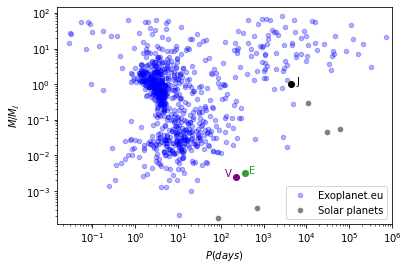

In [22]:
N = [1,2,5] #index of solar planets i'll distinguish on the plot
planet_name, planet_color = ['V','E','J'], ['purple','tab:green','k']
d=[-100,100,1600] #this helps put the labels in the right place

plt.scatter(P, M, label = "Exoplanet.eu", c='b',s=20,alpha=0.3)
plt.scatter(P_solar, M_solar, label = "Solar planets",c='gray', s=20)

for i,n in enumerate(N):
    plt.scatter(P_solar[n],M_solar[n],c=planet_color[i])
    plt.annotate(planet_name[i],(P_solar[n]+d[i],M_solar[n]),c=planet_color[i])

plt.ylabel(r"$M/M_J$")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$P (days)$")
plt.ylim(12e-5,15e1)
plt.xlim(15e-3,10e5)
plt.legend(loc='lower right')
#plt.title(r"Mass-Period")
plt.savefig("data.pdf",dpi=1000,transparent=True)
plt.show()

Which is a first visualization for the relationship between orbital period and mass, in the full range we're studying, and also reproduces the figure in my document.

We can already see the three separate groups.

In [15]:
len(data_EU)

905

In [23]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300, tol=0.0003).fit(np.log10(data_EU))
centroids, labels = kmeans.cluster_centers_, kmeans.labels_

N = [1,2,5]

colors, group_names = ['r','b','g','r','k'], ['Hot Jupiters','Ungiants','Long Period Giants']
label_color, label_names = [], []
for l in labels:
    label_color = np.append(label_color, colors[l])
    label_names = np.append(label_names, group_names[l])

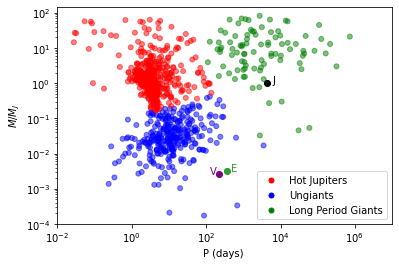

In [24]:
#applying resulton test data
#plt.scatter(P,M,c='grey',s=25,alpha=0.3)    
plt.scatter(P,M,c=label_color,s=25,alpha=0.5)
legend2=[]
for i, n in enumerate(N):
    plt.scatter(P_solar[n],M_solar[n],c=planet_color[i])
    plt.annotate(planet_name[i],(P_solar[n]+d[i],M_solar[n]),c=planet_color[i]) 
    legend2 = np.append(legend2, Line2D([0], [0],lw=0,c=colors[i],marker='o',mec=colors[i],markersize=5))
plt.xlabel('P (days) ')
plt.ylabel(r'$M/M_J$ ')
plt.yscale('log')
plt.xscale('log')
plt.ylim(10e-5,15e1)
plt.xlim(10e-3,10e6)
plt.legend(legend2, group_names, loc='lower right',fontsize=10)
plt.savefig("groups.pdf",dpi=1000,transparent=True)
plt.show()

In [ ]:
pd_labels, pd_names = pd.DataFrame(labels,index=data_EU.index), pd.DataFrame(label_names,index=data_EU.index),
data_EU['label'], data_EU['names']= pd_labels, pd_names
ungiants = data_EU.loc[data_EU.names=='Ungiants']
e_gts=data_EU.loc[data_EU.names=='Long P. Giants']
hot_jups=data_EU.loc[data_EU.names=='Hot Jupiters']

In [216]:
print(len(ungiants),len(e_gts),len(hot_jups))
len(ungiants)+len(e_gts)+len(hot_jups)

92 509 304


905

In [94]:
len(data_EU)

908

In [178]:
np.

81.9

In [192]:
np.min(M)

2.1e-06

In [185]:
np.min(P)-np.max(P)

-729999.9721708

In [190]:
np.max(np.log10(P))

5.863322860120456

In [275]:
np.where(np.array([3,3,2])==0) == np.array([])

array([], shape=(1, 0), dtype=bool)